# Week 1: Exploratory data analysis

In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statistics

### Introduction:

In [52]:
#Het csv bestand 'steps' inladen.
df_steps = pd.read_csv('steps.csv', sep = ';')
#Eerste 5 regels uitprinten.
df_steps.head() 

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
#Toevoegen van extra column in 'df_steps' met het gemiddeld aantal stappen.
df_steps["average_steps"] = df_steps.mean(axis = 1) 
#Kijken de toegevoegde extra column goed is gegaan. 
print(df_steps.head())

#Toevoegen van extra column in 'highest_steps' met het hoogste aantal stappen.
df_steps["highest_steps"] = df_steps.apply(max, axis = 1) 
#Kijken de toegevoegde extra column goed is gegaan. 
print(df_steps.head())


   id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0   1        NaN        NaN        NaN        NaN     3941.0    15733.0   
1   2        NaN        NaN    10473.0      705.0     4287.0     5507.0   
2   3        NaN    11428.0    12523.0     2553.0      190.0     2164.0   
3   4        NaN        NaN        NaN        NaN        NaN        NaN   
4   5        NaN        NaN        NaN        NaN        NaN        NaN   

   26-6-2013  27-6-2013  28-6-2013  ...  5-5-2014  6-5-2014  7-5-2014  \
0     9929.0    12879.0    10541.0  ...       NaN       NaN       NaN   
1     4024.0     3926.0    14595.0  ...       NaN       NaN       NaN   
2     8185.0     9630.0     8983.0  ...    4364.0       NaN       NaN   
3        NaN        NaN        NaN  ...       NaN       NaN       NaN   
4        NaN        NaN        NaN  ...       NaN       NaN       NaN   

   8-5-2014  9-5-2014  10-5-2014  11-5-2014  12-5-2014  13-5-2014  \
0       NaN       NaN        NaN        N

In [54]:
#Het csv bestand 'survey' inladen.
df_survey = pd.read_csv('survey.csv')
#Eerste 5 regels uitprinten.
df_survey.head() 

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Data cleaning:

In [55]:
#De twee databestanden samenvoegen op basis van een gezamelijke overeenkomst, in dit geval het id. 
df = pd.merge(df_steps, df_survey, on = 'id') 
#Eerste 5 regels uitprinten.
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,average_steps,highest_steps,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,10144.048193,35195.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,5652.756098,18992.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,8246.033557,23039.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3460.380952,11396.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5215.636364,18392.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [56]:
#Het conventeren naar numerieke waarden. Dit zodat er tijdens de analyse's geen fouten kunnen ontstaan. 
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')

#Bij 'weight'worden alle waardes boven de 250 kilo en onder de 30 kilo word uit de data gehaald om de uitschieters eruit te halen. 
def above_250_under_30(x):
    if(x > 250): 
        return float('NaN')
    elif(x < 30):
        return float("NaN")
    else: 
        return x
df['weight'] = df['weight'].apply(above_250_under_30)

#Om de uitschieters bij de het gemiddeld aantal stappen per gebruiker eruit te halen. 
def above_25000(x):
    if(x > 25000): 
        return float('NaN')
    else: 
        return x
df['average_steps'] = df['average_steps'].apply(above_25000)

### Exploratory data analysis:

Text(0, 0.5, 'Aantal gebruikers')

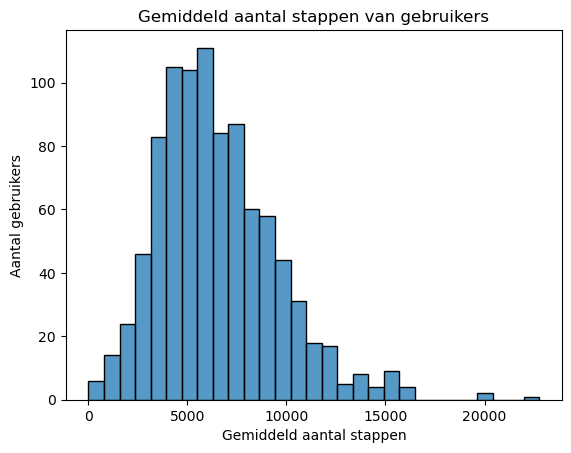

In [57]:
#Histogram van het gemiddeld aantal stappen.
sns.histplot(data=df, x='average_steps')
plt.title('Gemiddeld aantal stappen van gebruikers')
plt.xlabel('Gemiddeld aantal stappen')
plt.ylabel('Aantal gebruikers')

Bevinding:
Er is sprake van een rechtsscheve verdeling. 

Text(0.5, 0, 'Gemiddeld aantal stappen')

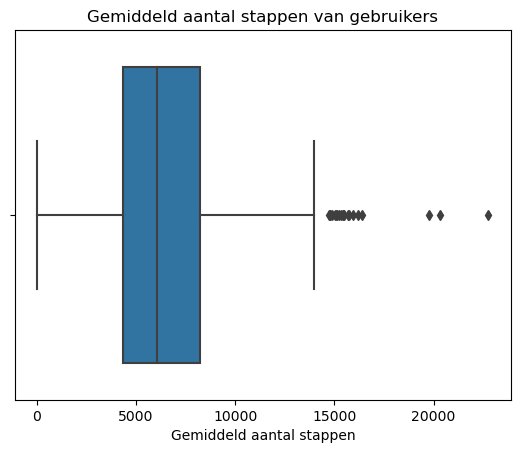

In [58]:
#Boxplot van het gemiddeld aantal stappen.
sns.boxplot(data=df, x='average_steps')
plt.title('Gemiddeld aantal stappen van gebruikers')
plt.xlabel('Gemiddeld aantal stappen')


In [59]:
#Gemiddelde van het gemiddeld aantal stappen per gebruiker.
print(df['average_steps'].mean(axis=0))

#Mediaan van het gemiddeld aantal stappen per gebruiker.
print(df['average_steps'].median(axis=0))

#Standard devilatie van het gemiddeld aantal stappen per gebruiker.
print(df['average_steps'].std(axis=0))

6517.099912432322
6062.419847328244
3009.7695768522


De 'outliners' heb ik er aan het begin al uitgehaald toen ik zag dat deze er waren. Ik heb dit gedaan omdat ik zag dat er een paar extreme waarden in zaten. Omdat deze waarden de dataset vervuilde heb ik besloten deze eruit te halen. Het zou bijvoorbeeld het gemiddelde behoorlijk beinvloeden. 

De gegevens zijn niet helemaal normaal verdeeld zoals goed in het eerste en tweede figuur is. De gegevens zijn een beetje rechtsscheef. 

Text(0, 0.5, 'Leeftijdscategorie')

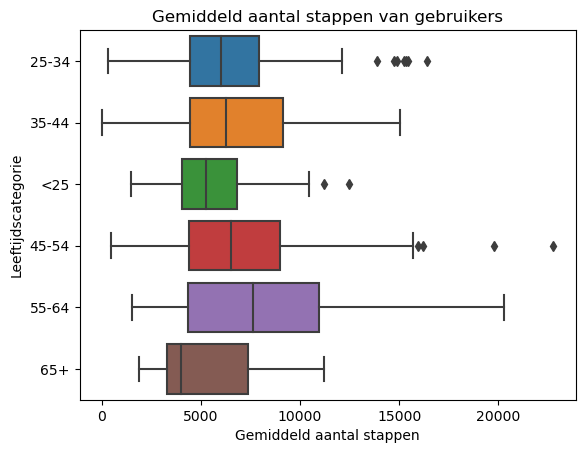

In [60]:
#Boxplot van het gemiddeld aantal stappen met het onderscheid gemaakt in leeftijd.
sns.boxplot(data=df, x='average_steps', y='age')
plt.title('Gemiddeld aantal stappen van gebruikers')
plt.xlabel('Gemiddeld aantal stappen')
plt.ylabel('Leeftijdscategorie')

Bevinding:
Het gemiddeld aantal stappen word meer naar mate je ouder word tot dat je 65+ bent. Dan zakt het aantal stappen weer. Gebruikers met een leeftijd tussen de 55-66 zetten het meeste stappen, en gebruikers ouder dan 65 het minste. Daarnaast is de spreiding ook groter bij 55-64 dan bij bijvoorbeeld onder de 25 jaar.

Text(0, 0.5, 'Aantal gebruikers')

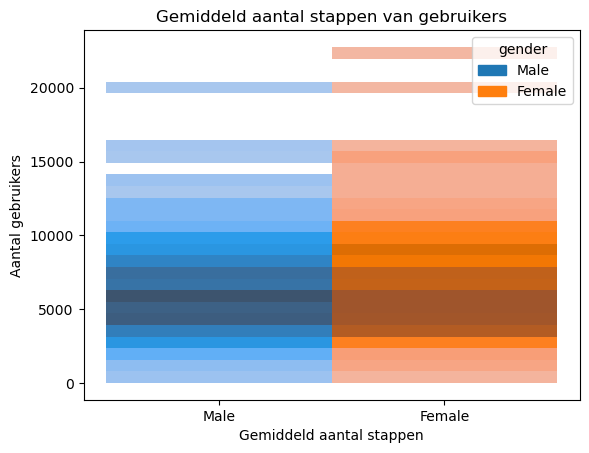

In [61]:
#Histogram van het gemiddeld aantal stappen.
sns.histplot(data=df, y='average_steps', x='gender', hue='gender')
plt.title('Gemiddeld aantal stappen van gebruikers')
plt.xlabel('Gemiddeld aantal stappen')
plt.ylabel('Aantal gebruikers')

Bevindingen: je zit dat de er een meer geconsenteerde aantal gezete stappen is en bij de vrouwen meer verspreid. 

Text(0, 0.5, 'Aantal gebruikers')

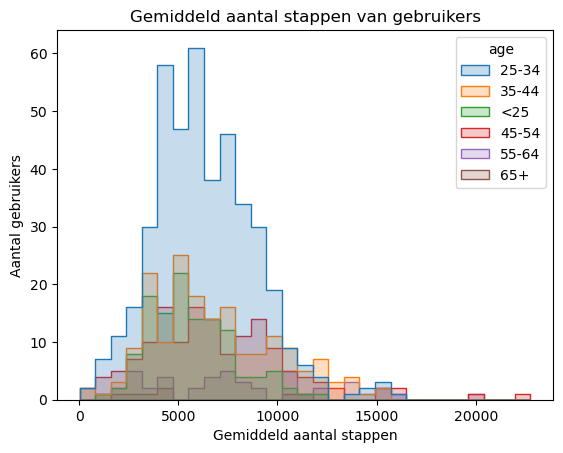

In [62]:
#Histogram van het gemiddeld aantal stappen  verdeeld in leeftijd.
sns.histplot(data=df, x='average_steps', hue='age', element='step')
plt.title('Gemiddeld aantal stappen van gebruikers')
plt.xlabel('Gemiddeld aantal stappen')
plt.ylabel('Aantal gebruikers')

Bevindingen: Veel grbuikers zijn tussen de 25-34 jaar oud. Maar er zitten geen grote verschillen in het aantal stappen dat iemand zat afhankelijk van de leeftijd. Mensen van 55-64 zetten ongeveer evenveel stappen als mensen onder de 25 jaar.  

# Week 2: Linear regression

In [63]:
import sklearn as sk #this is the most popular library for statistics and machine learning

### Exploratory data analysis

#### Scatterplot 1

Text(0, 0.5, 'Gemiddeld aantal stappen')

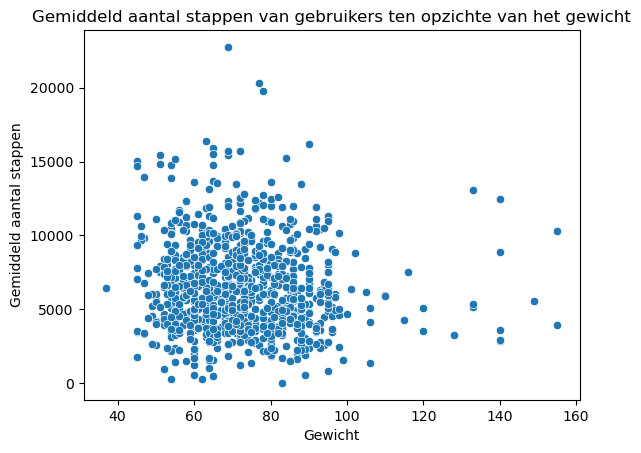

In [64]:
sns.scatterplot(data=df, x='weight', y='average_steps')
plt.title('Gemiddeld aantal stappen van gebruikers ten opzichte van het gewicht')
plt.xlabel('Gewicht')
plt.ylabel('Gemiddeld aantal stappen')

In [65]:
df_r2 = df.dropna(subset=['weight', 'average_steps']) #Ander werkt de r2_score functie niet omdat hij niet kan rekenen met NaN.

from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df_r2['weight'], df_r2['average_steps'])

-210169.08108537586

Bevinding: Er zit geen verband tussen het gewicht van een gebruiker en het aantal stappen dat deze gebruiker zet. 

#### Scatterplot 2

Text(0, 0.5, 'Lengte')

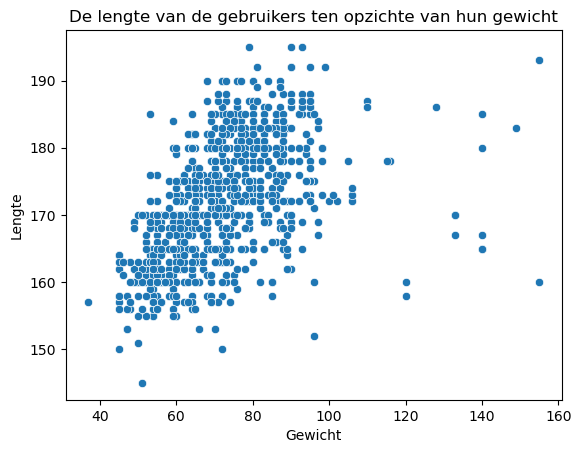

In [66]:
sns.scatterplot(data=df, x='weight', y='height')
plt.title('De lengte van de gebruikers ten opzichte van hun gewicht')
plt.xlabel('Gewicht')
plt.ylabel('Lengte')

In [67]:
df_r2_2 = df.dropna(subset=['weight', 'height']) #Ander werkt de r2_score functie niet omdat hij niet kan rekenen met NaN.

from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df_r2_2['weight'], df_r2_2['height'])

-41.205075463261

Bevinding: Er lijkt op de scatterplot wel sprake te zijn van enig verband tussen de variable. Echter wanneer de corrolatie word berekend is er totaal geen sprake van enige corrolatie. 

#### Scatterplot 3

In [82]:
#Om de uitschieters bij de het gemiddeld aantal stappen per gebruiker eruit te halen. 
def above_200000(x):
    if(x > 200000): 
        return float('NaN')
    else: 
        return x
df['highest_steps'] = df['highest_steps'].apply(above_200000)

Text(0, 0.5, 'Gemiddeld aantal stappen')

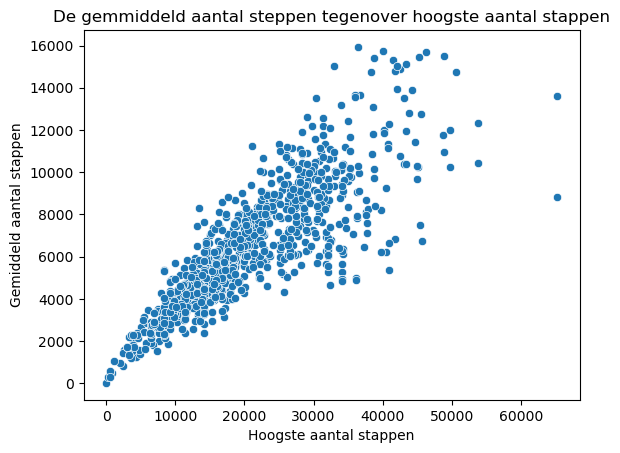

In [97]:
sns.scatterplot(data=df, x='highest_steps', y='average_steps')
plt.title('De gemmiddeld aantal steppen tegenover hoogste aantal stappen')
plt.xlabel('Hoogste aantal stappen')
plt.ylabel('Gemiddeld aantal stappen')

In [100]:
df_r2 = df.dropna(subset=['average_steps']) #Ander werkt de r2_score functie niet omdat hij niet kan rekenen met NaN.
df_r2 = df.dropna(subset=['highest_steps']) #Ander werkt de r2_score functie niet omdat hij niet kan rekenen met NaN.

from sklearn.metrics import r2_score #we need this function from sklearn
r2_score(df_r2['highest_steps'], df_r2['average_steps'])

-1.5730446903438269

Bevinding: Hier lijkt toch wel een redelijk sterk verband. Die R2 score lijkt niet helemaal te werken want hij heeft hier een negatief verband aan, dat kan ik toch niet helemaal verklaren. 

### Predictive model

Uitleg lineaire regressie: Lineaire regressie is een regressiemodel dat de relatie tussen de ene variabele en de andere variabele schat met behulp van een rechte lijn. De lijn gaat dus opzoek naar de weg waar alle punten het dichste bij liggen en waar de afstand het minst groot is. Zo kan voorspeld worden als de ene variabele X is wat dan waarschijnlijk de andere variabele is. 

In [104]:
from sklearn.linear_model import LinearRegression 


x = df_r2[['average_steps']] 
y = df_r2['highest_steps']
lm = LinearRegression() #this creates a new LR model
lm = lm.fit(x, y) #this "fits" the model

In [110]:
df_r2['highest_steps_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe
df_r2.head()

C:\Users\guusv\AppData\Local\Temp\ipykernel_24500\3625928310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r2['highest_steps_p'] = lm.predict(x) #use built-in predict() method to generate predictions; store in original dataframe


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,city,gender,age,hh_size,education,education_1,height,weight,median_steps_p,highest_steps_p
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,31784.376979,31784.376979
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,18368.727530,18368.727530
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,26114.939663,26114.939663
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,11820.024889,11820.024889
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,17063.035317,17063.035317


In [111]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

sqrt(mean_squared_error(df_r2['highest_steps'], df_r2['highest_steps_p']))

5628.961592437097

Bevinding: De voorspelde gemiddelde aantal stappen wijken gemiddeld 5628 stappen van de daadwerkelijke gemiddelde aantal stappen.

In [115]:
df = pd.get_dummies(data=df, columns=['gender'])
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,highest_steps,city,age,hh_size,education,education_1,height,weight,gender_Female,gender_Male
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,35195.0,Bordeaux,25-34,4,4,Master or doctorate,178.0,98.0,0,1
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,18992.0,Lille,35-44,1,3,Bachelor,180.0,77.0,0,1
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,23039.0,Montpellier,25-34,2,2,Master or doctorate,180.0,83.0,0,1
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11396.0,Lyon,<25,1,1,Bachelor,178.0,80.0,0,1
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18392.0,Montpellier,25-34,3,4,Bachelor,167.0,61.0,1,0


Text(0, 0.5, 'Lengte')

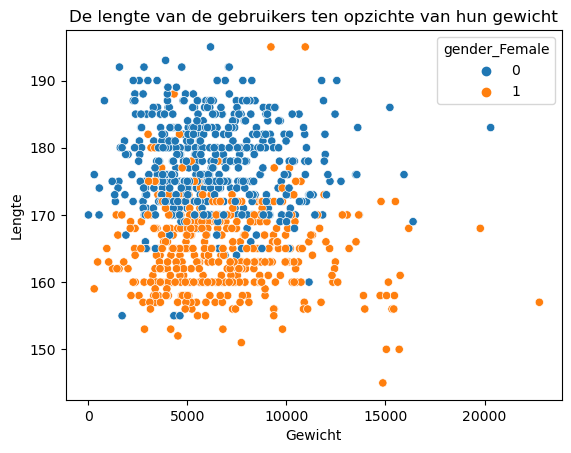

In [122]:
sns.scatterplot(data=df, x='average_steps', y='height', hue='gender_Female' )
plt.xlabel('Gewicht')
plt.ylabel('Lengte')

## Evaluation

R2: Ik heb denk ik iets fout gedaan want bij mij kwamen die R2-waardes elke keer heel laag uit en klopte er niet zoveel van. Maar ben dr niet achtergekomen wat er niet klopte.

Wat ik jammer vond aan de dataset is dat je er lastig echt verbanden uit kon trekken, alleen verbanden die echt heel logisch waren. Ik heb hellaas niet echt goed voor elkaar gekregen om met 'gender' nog echt iets voor elkaar te krijgen. Ik heb t op t laaste nog wel geprobeerd maar was niet helemaal wat ik er van verwachten. 